# IMPORTING DATASHEET

In [11]:
import pandas as pd

# Load the dataset

df=pd.read_csv("diabetes.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# VISUALIZATION 

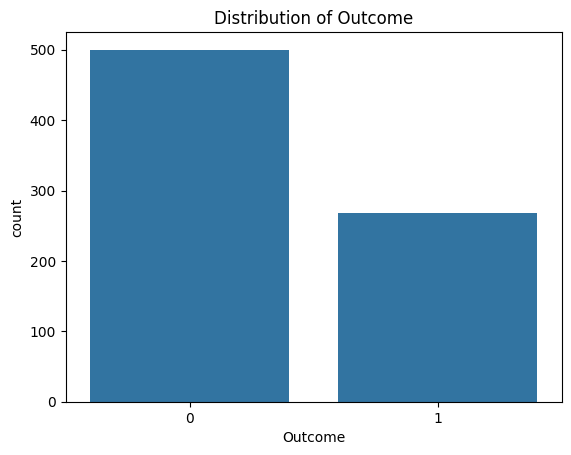

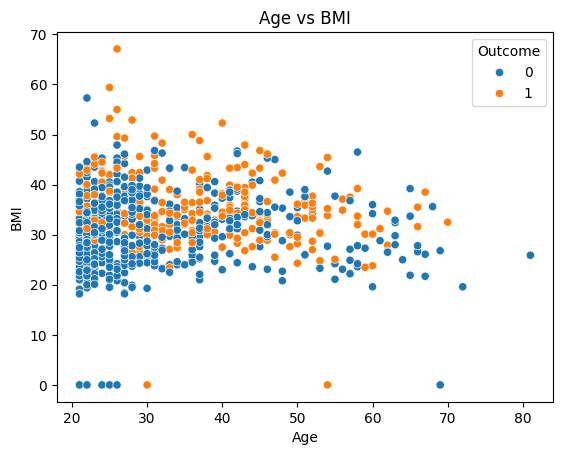

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

# Visualize the relationship between 'Age' and 'BMI'
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('Age vs BMI')
plt.show()


In [13]:
print(df.columns)
print(df.dtypes)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# CORRELATION MATRIX

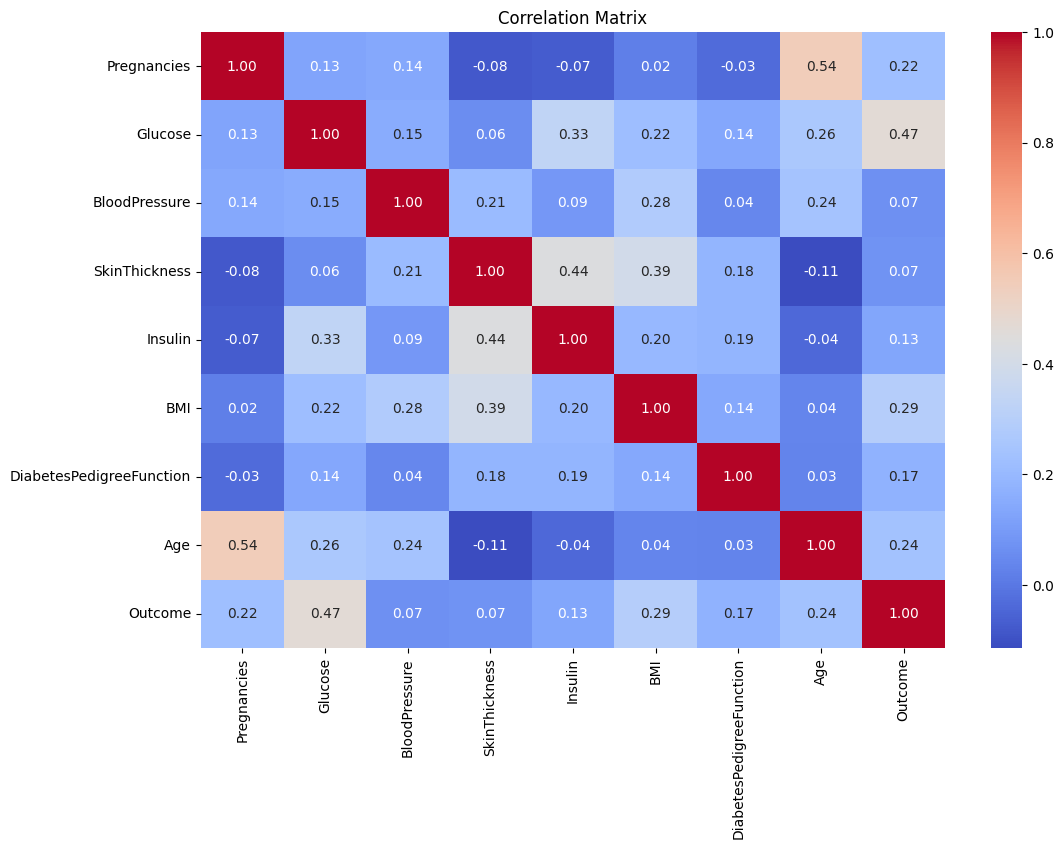

LinearRegression()

In [14]:


# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Split the data into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)




# Evaluate the models

In [24]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load the saved models
dt_model = joblib.load('decision_tree_model.joblib')
rf_model = joblib.load('random_forest_model.joblib')
lr_model = joblib.load('linear_regression_model.joblib')

# Predictions for Decision Tree and Random Forest
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Linear Regression Accuracy:", accuracy_lr)(y_test, y_pred_lr_class)

print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Predictions for Linear Regression


# Convert regression predictions to binary values for classification
y_pred_lr_class = [1 if x >= 0.5 else 0 for x in y_pred_lr]

# Evaluation for Linear Regression
accuracy_lr = accuracy_score


print("\nLinear Regression Classification Report:\n", classification_report(y_test, y_pred_lr_class))


Decision Tree Accuracy: 0.7467532467532467
Random Forest Accuracy: 0.7207792207792207

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Linear Regression Mean Squared Error: 0.17104527280850101
Linear Regression R-squared: 0.25500281176741757


# Save the models using joblib

In [16]:
import joblib
joblib.dump(dt_model, 'decision_tree_model.joblib')
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(lr_model, 'linear_regression_model.joblib')


['linear_regression_model.joblib']

In [17]:
print(y_test)

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64
